# Introduction
For this project, data on GDP and life expectancy from the World Health Organization and the World Bank will be analysed and visualised to try and identify the relationship between the GDP and life expectancy of six countries.

## Data
The dataset has the following columns:

- `Country` - nation
- `Year` - the year for the observation
- `Life expectancy at birth (years)` - life expectancy value in years
- `GDP` - Gross Domestic Product in U.S. dollars

<div class="alert alert-block alert-info">
    
**Categorical variables**<br>

* Country
* Year


**Numerical**<br>

* Life expectancy
* GDP
</div>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [12]:
df.shape

(96, 4)

## Data Preparation

In [67]:
# How many variables? How many observations?
print(f'The dataset has {df.shape[0]} observations and {df.shape[1]} variables.\n')
print('-' * 40)

# Missing data?
print('Checking if there are missing values:')
print(df.isnull().sum())
print('-' * 40)

# Types of variables?
print('Examine data types in dataset:')
print(df.dtypes) # Both categorical (Country and Year) and numerical (Life Exp and GDP)
print('-' * 40)

# What are the variables in the dataset?
print(f'The variables in the dataset are:') 
for col in df.columns: print(col)

The dataset has 96 observations and 4 variables.

----------------------------------------
Checking if there are missing values:
Country     0
Year        0
Life_exp    0
GDP         0
dtype: int64
----------------------------------------
Examine data types in dataset:
Country      object
Year          int64
Life_exp    float64
GDP         float64
dtype: object
----------------------------------------
The variables in the dataset are:
Country
Year
Life_exp
GDP


The `Life expectancy at birth` column has a long name, and it will be difficult to type while doing analysis / visualisations. Let's change that name to a shorter string like `Life_exp`.

In [14]:
df.rename(columns={'Life expectancy at birth (years)': 'Life_exp'}, inplace=True)
df.columns

Index(['Country', 'Year', 'Life_exp', 'GDP'], dtype='object')

In [15]:
# What's the year range in the dataset?
print(df['Year'].nunique())  # There are 16 years in the dataset
print(df['Year'].unique())  # From 2000 to 2015

16
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [16]:
# How many countries are represented in the dataset?
print(df['Country'].nunique())  # There are 6 countries
print(df['Country'].unique())

6
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [17]:
# Let's look at those GDP values
# First extract the series into a numpy array
gdp = np.array(df['GDP'])

print(f'The mean GDP of whole dataset is {np.mean(gdp):,.2f}')
print(f'The lowest GDP value is {np.min(gdp):,.2f}')
print(f'The highest GDP value is {np.max(gdp):,.2f}\n')

# Those GDP values are difficult to read, so Pandas can be changed to display commas and round decimals to two places
pd.options.display.float_format = '{:,.2f}'.format
df.head()

The mean GDP of whole dataset is 3,880,498,570,768.40
The lowest GDP value is 4,415,702,800.00
The highest GDP value is 18,100,000,000,000.00



,Country,Year,Life_exp,GDP
0,Chile,2000,77.30,"77,860,932,152.00"
1,Chile,2001,77.30,"70,979,923,960.00"
2,Chile,2002,77.80,"69,736,811,435.00"
3,Chile,2003,77.90,"75,643,459,840.00"
4,Chile,2004,78.00,"99,210,392,858.00"


# Exploratory Plots

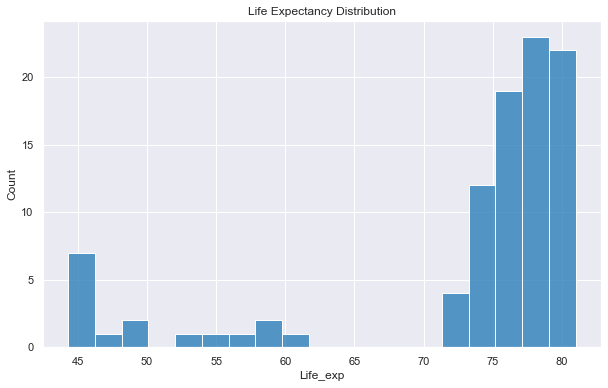

In [63]:
# Plotting life expectancy
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(context='notebook', style='darkgrid', palette='tab10')
ax = sns.histplot(data=df, x='Life_exp')
ax.set_title('Life Expectancy Distribution');

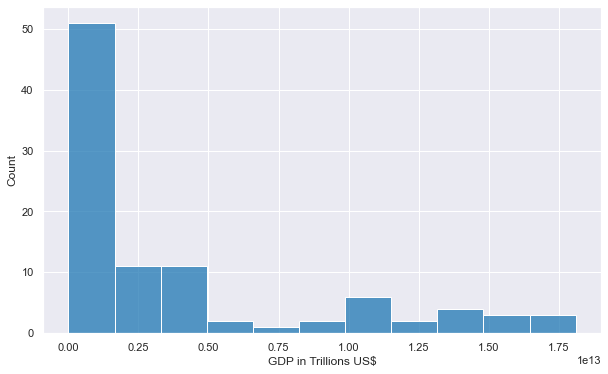

In [19]:
# Plotting GDP
plt.figure(figsize=(10, 6))
sns.set_theme(context='notebook', style='darkgrid', palette='tab10')
sns.histplot(df["GDP"])
plt.xlabel('GDP in Trillions US$');

The plot shows `GDP` plotted in a histogram. The distribution of the values are heavily **right skewed**, with most values on the left side.<br>


## Determining mean GDP by country

In [20]:
df_means = df.drop('Year', axis=1).groupby('Country').mean().reset_index()
df_means

,Country,Life_exp,GDP
0,Chile,78.94,"169,788,845,015.31"
1,China,74.26,"4,957,713,750,000.00"
2,Germany,79.66,"3,094,775,625,000.00"
3,Mexico,75.72,"976,650,625,000.00"
4,United States of America,78.06,"14,075,000,000,000.00"
5,Zimbabwe,50.09,"9,062,579,595.06"


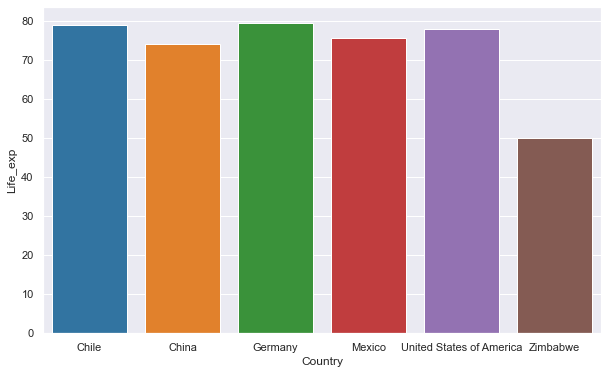

In [62]:
# Plotting Life Expectancy for all countries
plt.figure(figsize=(10, 6))
sns.set_theme(context='notebook', style='darkgrid', palette='tab10')
sns.barplot(x='Country', y='Life_exp', data=df_means);

All countries except for **Zimbabwe** seem to have `Life Expectancy` between the 70 and 80 years old. This explains the distribution seen in the histogram plot above.

### Line Plots

Now, a line chart is plotted to explore the change of `GDP` over the range of years covered in the dataset.<br>
The countries are separated by colour and it's clear the **US** and **China** have seen substantial GDP gains over the years. The other countries have not seen the same increases in this magnitude.

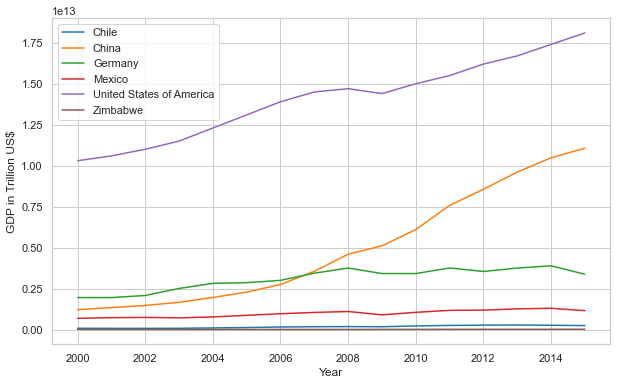

In [22]:
plt.figure(figsize=(10, 6))
sns.set_theme(context='notebook', style='whitegrid', palette='tab10')
sns.lineplot(x=df["Year"], y=df["GDP"], hue=df["Country"], data=df)
plt.legend()
plt.ylabel('GDP in Trillion US$');

The second line plot looks at `Life Expectancy` over the same period of time.<br>
Most countries have seen steady increases in their life expectancy, including **Zimbabwe** despite having a dip in **2004**.

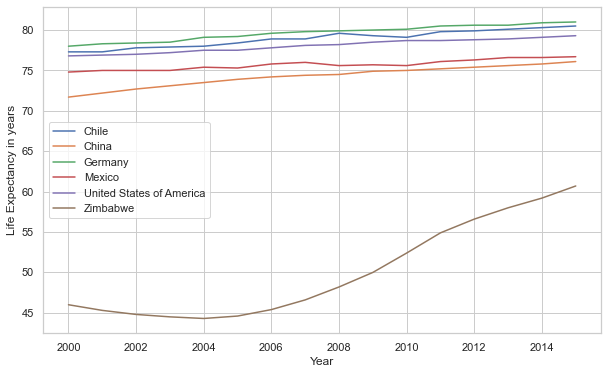

In [23]:
plt.figure(figsize=(10, 6))
sns.set_theme(context='notebook', style='whitegrid')
sns.lineplot(data=df, x='Year', y='Life_exp', hue='Country')
plt.legend()
plt.ylabel('Life Expectancy in years');

### Scatter Plots

The analysis will explore now the relationship between `GDP` and `Life Expectancy`.<br>
A positive linear relationship seems to exist between the two variables, in that they exhibit a rise in life expectancy as GDP goes up. However, Zimbabwe does not have the same strong relationship, with only modest increase in life expectancy while GDP remains flat.

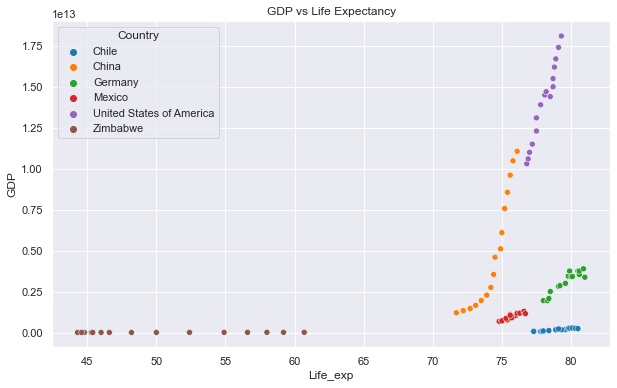

In [24]:
plt.figure(figsize=(10, 6))
sns.set_theme(context='notebook', style='darkgrid', palette='tab10')
sns.scatterplot(
    x = 'Life_exp',
    y = 'GDP',
    hue = 'Country',
    data = df
)
plt.title('GDP vs Life Expectancy');

Like the previous plots, countries are broken out into each scatter plot by facets. Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between `GDP` and `Life Expectancy`. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a **positive correlation**.

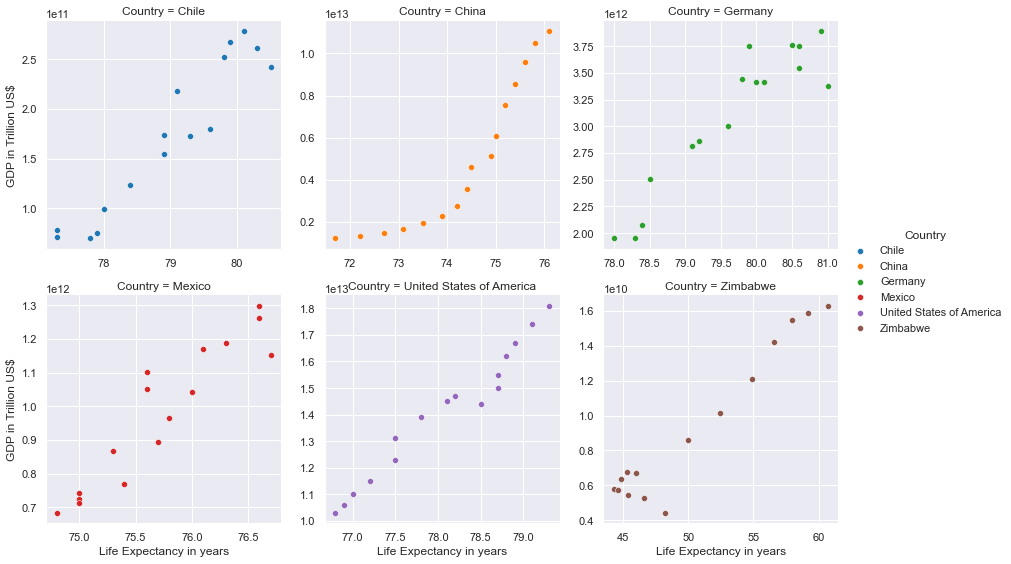

In [68]:
graph = sns.FacetGrid(
    data = df,
    col_wrap = 3,
    col = 'Country',
    hue = 'Country',
    height = 4,
    sharey = False, sharex = False
)
sns.set_theme(context='notebook', style='darkgrid', palette='tab10')
graph.map(sns.scatterplot, "Life_exp", "GDP").add_legend()
graph.set_axis_labels("Life Expectancy in years", "GDP in Trillion US$");

## Conclusions

1. Has life expectancy increased over time in the six nations?<br>
    - Yes with Zimbabwe having the greatest increase.<br>
2. Has GDP increased over time in the six nations?<br>
    - GDP has also increased for all countries in our list, especially for China.
3. Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
4. What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
5. What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.